### Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


### Loading in the dataset

In [3]:
#loading the csv dataset to a Pandas DataFrame
credit_card_data = pd.read_csv("C:\\Users\\gouth\\Downloads\\archive (1)\\fraudTrain.csv")

In [4]:
credit_card_data.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [5]:
credit_card_data.tail(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296665,1296665,2020-06-21 12:08:42,213193596103206,fraud_Gulgowski LLC,home,72.17,James,Hunt,M,7369 Gabriel Tunnel,...,45.7549,-84.4470,95,Electrical engineer,1994-02-09,108c103b26f686c24c021aaf4210977e,1371816522,44.938461,-83.996234,0
1296666,1296666,2020-06-21 12:09:22,4587657402165341815,"fraud_Hyatt, Russel and Gleichner",health_fitness,7.30,Amber,Lewis,F,6296 John Keys Suite 858,...,41.0646,-87.5917,2135,"Psychotherapist, child",2004-05-08,37a18c6fb0c5c722b6339ffedc82f55a,1371816562,40.556811,-88.092339,0
1296667,1296667,2020-06-21 12:10:56,4822367783500458,"fraud_Hahn, Douglas and Schowalter",travel,19.71,Christopher,Farrell,M,97070 Anderson Land,...,28.0758,-81.5929,33804,Exercise physiologist,1991-01-01,34e72e0a659a6c8f4a20ee65594f3a7d,1371816656,27.465871,-81.511804,0
1296668,1296668,2020-06-21 12:11:23,213141712584544,"fraud_Metz, Russel and Metz",kids_pets,100.85,Margaret,Curtis,F,742 Oneill Shore,...,32.1530,-90.1217,19685,Fine artist,1984-12-24,0d86d8c17638d7eff77db9c6a878b477,1371816683,31.377697,-90.528450,0
1296669,1296669,2020-06-21 12:11:36,4400011257587661852,fraud_Stiedemann Inc,misc_pos,37.38,Marissa,Powell,F,474 Allen Haven,...,41.4972,-98.7858,509,"Nurse, children's",1980-09-15,9a7ea2625cf8303efe34e3c09546868f,1371816696,41.728638,-99.039660,0
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [6]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
credit_card_data.sort_values(by="is_fraud",ascending=False)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1219103,1219103,2020-05-24 23:45:11,3558652751678952,"fraud_Lehner, Mosciski and King",misc_net,743.89,Teresa,Blankenship,F,6638 Lucero Mill Suite 952,...,32.6205,-94.2000,2807,Chiropodist,1931-01-26,45f0a187e009ad4689478609a5f64729,1369439111,32.708128,-94.234777,1
534363,534363,2019-08-17 23:29:59,4294930380592,fraud_Fisher-Schowalter,shopping_net,1025.63,Misty,Rivera,F,1980 Vasquez Manors Apt. 574,...,37.3696,-80.1284,1363,Equality and diversity officer,1940-08-23,5405291624d0586d91f997ba69f606e7,1345246199,37.875435,-80.495411,1
631916,631916,2019-09-25 23:59:54,4836998673805450,fraud_Botsford PLC,home,248.95,Susan,Hardy,F,516 Brown Parks,...,46.0062,-86.2555,6469,Trade mark attorney,1979-04-12,f60fd1f35582d368a54267d74649750b,1348617594,46.200548,-86.162779,1
534357,534357,2019-08-17 23:28:07,4044436772018844508,fraud_Bins-Howell,personal_care,17.02,Amy,Abbott,F,01505 Amy Stravenue,...,39.8355,-84.2613,479994,Environmental manager,1970-11-09,f925083c0bf03af20dca16dd1cf39531,1345246087,39.381320,-83.944767,1
237740,237740,2019-04-29 10:13:47,6011826317034777,fraud_Smitham-Schiller,grocery_net,10.93,Christine,Johnson,F,9612 Robert Light Apt. 340,...,38.6790,-75.3932,18799,"Designer, multimedia",2000-03-16,788a8fea8199a4e8a6a47ffab824e571,1335694427,37.691598,-76.058416,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433748,433748,2019-07-13 12:57:07,581686439828,"fraud_Turcotte, Batz and Buckridge",health_fitness,6.70,Larry,House,M,911 Sabrina Trafficway,...,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,0e4f674a815fed8a6f9491d117c22aed,1342184227,40.593854,-80.783595,0
433747,433747,2019-07-13 12:56:55,4992346398065154184,fraud_Bahringer Group,health_fitness,18.49,Benjamin,Kim,M,920 Patrick Light,...,41.1730,-89.2187,532,Audiological scientist,1956-01-09,796065ff552d683fed7d1ed1ddcb9ab1,1342184215,42.124585,-88.498785,0
433746,433746,2019-07-13 12:56:51,30501624614310,"fraud_Runte, Green and Emard",health_fitness,20.57,Amanda,Smith,F,180 Graves Shore,...,32.6786,-81.2455,302,Magazine features editor,1973-05-04,a1659e71ba2f19e3fd4287b335aa8877,1342184211,31.916693,-80.308641,0
433745,433745,2019-07-13 12:56:48,213124978348176,"fraud_Windler, Goodwin and Kovacek",home,30.79,Steven,Arnold,M,079 Chelsea Rest,...,42.3200,-78.0943,1766,Mechanical engineer,1962-06-04,ad2a9fda6fc2a0037b7d26b11127f1e6,1342184208,41.960678,-77.875833,0


In [8]:
#To check the no. of missing values in each column 
credit_card_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### Dropping null values and unrelated variables

In [9]:
credit_card_data=credit_card_data.dropna()

In [10]:
credit_card_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
# Columns to drop
columns_to_drop = ['trans_date_trans_time','merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']

# Drop the specified columns
credit_card_data = credit_card_data.drop(columns=columns_to_drop)

In [12]:
# Columns to drop
#columns_to_drop = ['trans_date_trans_time','merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']

# Drop the specified columns
credit_card_data = credit_card_data.drop(columns='Unnamed: 0')

In [13]:
credit_card_data.isnull().sum()

cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [14]:
credit_card_data

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0
1296671,6011149206456997,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0
1296672,3514865930894695,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0
1296673,2720012583106919,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0


In [15]:
credit_card_data=credit_card_data.apply(LabelEncoder().fit_transform)

In [16]:
credit_card_data.head(10)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,444,397,265,291,693,458,0,390185,861455,0
1,42,10623,965,964,60,43,1,1241513,78062,0
2,237,21906,858,736,88,486,2,1033312,119047,0
3,509,4400,614,931,91,367,3,1208203,115592,0
4,368,4096,231,398,753,22,4,557938,1027546,0
5,754,9363,177,567,860,386,5,781541,1108230,0
6,157,4354,696,373,163,423,6,451575,230608,0
7,820,7065,215,430,773,560,7,584363,1030973,0
8,776,327,142,563,749,301,8,743934,970182,0
9,453,19738,369,317,487,797,9,452417,638307,0


### Using Pearson's Correlation Coefficient as our Feature Selection Model

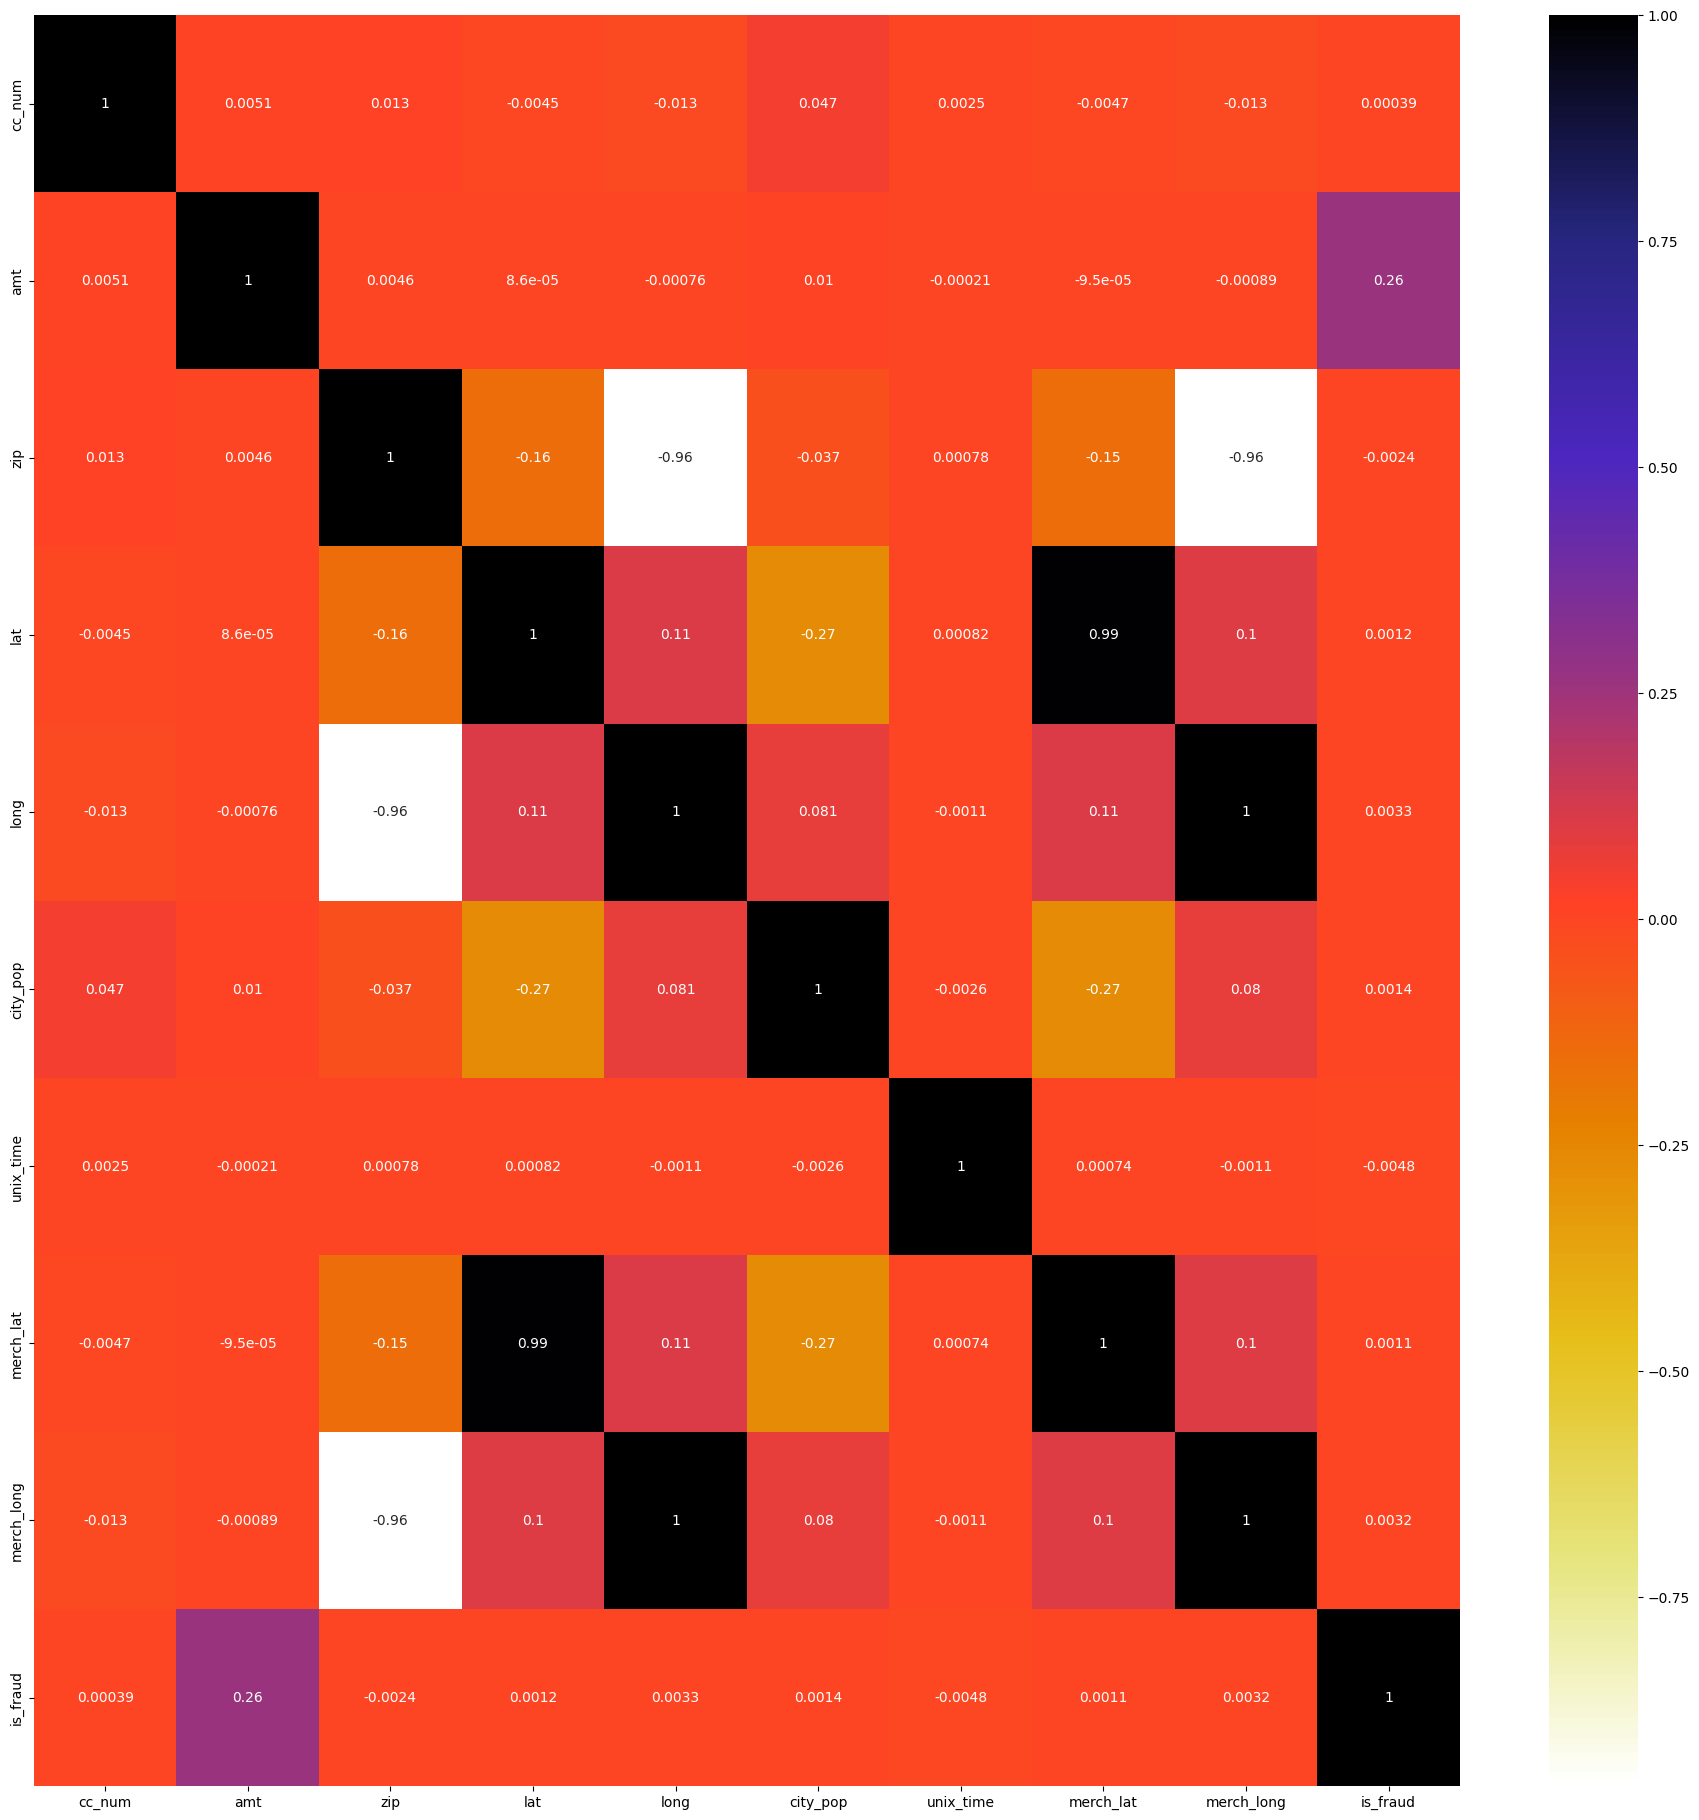

In [17]:
corrmat=credit_card_data.corr()
plt.figure(figsize=(23,23))
sns.heatmap(corrmat,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [18]:
credit_card_data.corr()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
cc_num,1.000000,0.005118,0.013445,-0.004450,-0.012790,0.047439,0.002469,-0.004685,-0.013006,0.000392
amt,0.005118,1.000000,0.004649,0.000086,-0.000759,0.010267,-0.000212,-0.000095,-0.000892,0.261904
zip,0.013445,0.004649,1.000000,-0.155104,-0.959394,-0.036737,0.000781,-0.154785,-0.957381,-0.002369
lat,-0.004450,0.000086,-0.155104,1.000000,0.106321,-0.266420,0.000824,0.990998,0.103064,0.001204
long,-0.012790,-0.000759,-0.959394,0.106321,1.000000,0.080924,-0.001128,0.106548,0.998309,0.003260
city_pop,0.047439,0.010267,-0.036737,-0.266420,0.080924,1.000000,-0.002560,-0.266550,0.079656,0.001436
unix_time,0.002469,-0.000212,0.000781,0.000824,-0.001128,-0.002560,1.000000,0.000741,-0.001099,-0.004778
merch_lat,-0.004685,-0.000095,-0.154785,0.990998,0.106548,-0.266550,0.000741,1.000000,0.103310,0.001061
merch_long,-0.013006,-0.000892,-0.957381,0.103064,0.998309,0.079656,-0.001099,0.103310,1.000000,0.003200
is_fraud,0.000392,0.261904,-0.002369,0.001204,0.003260,0.001436,-0.004778,0.001061,0.003200,1.000000


In [19]:
#function to remove least correlated columns
def correlation(credit_card_data,threshold):
    col_corr=set() #Set of all the names of correlated columns
    corr_matrix=credit_card_data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i , j] )> threshold:
                colname=corr_matrix.columns[i]  # we are interested in absolute coeff value
                col_corr.add(colname) # getting the name of column
    return col_corr
        

In [20]:
corr_features = correlation(credit_card_data,.7)
len(set(corr_features))

3

In [21]:
corr_features

{'long', 'merch_lat', 'merch_long'}

In [22]:
#dropping the irrelevant features 
credit_card_data=credit_card_data.drop(corr_features,axis=1)

In [23]:
#checking the distribution of legitmate transactions & fraudulent transactions 
credit_card_data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

### Dataset is highly unbalanced

##### 0 -> Normal Transaction

##### 1 -> Fraudulent Transaction


In [24]:
#separating the data for analysis 
legit= credit_card_data[credit_card_data.is_fraud==0]
fraud= credit_card_data[credit_card_data.is_fraud==1]

In [25]:
print(legit.shape)
print(fraud.shape)

(1289169, 7)
(7506, 7)


In [26]:
legit.amt.describe()

count    1.289169e+06
mean     6.114359e+03
std      7.043731e+03
min      0.000000e+00
25%      8.610000e+02
50%      4.628000e+03
75%      8.154000e+03
max      5.292700e+04
Name: amt, dtype: float64

In [27]:
fraud.amt.describe()

count     7506.000000
mean     31726.703171
std      18292.884081
min          6.000000
25%      24386.000000
50%      34256.500000
75%      47609.750000
max      51356.000000
Name: amt, dtype: float64

In [28]:
# compare the values for both transactions
credit_card_data.groupby('is_fraud').mean()

,cc_num,amt,zip,lat,city_pop,unix_time
is_fraud,,,,,,
0,490.046499,6114.358513,488.350815,481.276620,429.205564,637898.608634
1,491.499600,31726.703171,479.604050,485.743805,434.222622,614739.922595


### Random Sampling

In [29]:

X = credit_card_data.drop(columns=['is_fraud'])
y = credit_card_data['is_fraud']

# Undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Check the distribution after undersampling
print(y_res.value_counts())

is_fraud
0    7506
1    7506
Name: count, dtype: int64


In [30]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [31]:
print(y.value_counts())

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


In [32]:
X_train,X_test,y_train,y_test= train_test_split(X_res, y_res,test_size=0.2,stratify=y_res,random_state=1)

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
from sklearn import model_selection
seed = 7
num_tress = 50
kfold = model_selection.KFold(n_splits=15,random_state=None)
model=AdaBoostClassifier(n_estimators=num_tress,random_state=seed)
results = model_selection.cross_val_score(model,X_train ,y_train,cv=kfold)

c:\Users\gouth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\gouth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\gouth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\gouth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X_train,y_train)

c:\Users\gouth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
X_train_prediction=model.predict(X_train)
acc=accuracy_score(X_train_prediction,y_train)

In [38]:
print('Accuray ',acc*100,)

Accuray  83.79818390726582


In [39]:
X_test_prediction=model.predict(X_test)
acc1=accuracy_score(X_test_prediction,y_test)

In [40]:
print('Accuray ',acc1*100,)

Accuray  83.84658346067624


In [41]:
test_data = pd.read_csv("C:\\Users\\gouth\\Downloads\\archive (1)\\fraudTest.csv")

In [46]:
test_data = test_data.drop(columns=columns_to_drop)
test_data=test_data.drop(columns='Unnamed: 0')

In [47]:
test_data.head(10)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0
5,30407675418785,19.55,14816,42.1939,-76.7361,520,1371816937,41.747157,-77.584197,0
6,213180742685905,133.93,95528,40.5070,-123.9743,1139,1371816944,41.499458,-124.888729,0
7,3589289942931264,10.37,57374,43.7557,-97.5936,343,1371816950,44.495498,-97.728453,0
8,3596357274378601,4.37,16858,41.0001,-78.2357,3688,1371816970,41.546067,-78.120238,0
9,3546897637165774,66.54,76678,31.6591,-96.8094,263,1371816971,31.782919,-96.366185,0


In [48]:
credit_card_data=credit_card_data.apply(LabelEncoder().fit_transform)

In [49]:
test_data = test_data.drop(columns=corr_features)

In [50]:
X = test_data.drop(columns=['is_fraud'])
y = test_data['is_fraud']

In [51]:
X_predict=model.predict(X)
acc=accuracy_score(X_predict,y)

In [52]:
acc1=accuracy_score(X_test_prediction,y_test)
print('Accuray ',acc1*100,)

Accuray  83.84658346067624
